In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
data=pd.read_csv('https://raw.githubusercontent.com/omaarelsherif/Email-Spam-Detection-Using-NLP/main/dataset/emails.csv')
data.head()

text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

In [120]:
data.shape

(5728, 2)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [122]:
data.describe()

spam
count  5728.000000
mean      0.238827
std       0.426404
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

Data Visualisation

In [123]:
data['spam'].value_counts().plot.bar()
print(data['spam'].value_counts())

0    4360
1    1368
Name: spam, dtype: int64


Data Cleaning

In [124]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [125]:
data[data.duplicated()]

text  spam
2155  Subject: research allocations to egm  hi becky...     0
2260  Subject: departure of grant masson  the resear...     0
2412  Subject: re : schedule and more . .  jinbaek ,...     0
2473  Subject: day off tuesday  stinson ,  i would l...     0
2763  Subject: re : your mail  zhendong ,  dr . kami...     0
3123  Subject: re : grades  pam ,  the students rese...     0
3152  Subject: tiger evals - attachment  tiger hosts...     0
3248  Subject: re : i am zhendong  zhendong ,  thank...     0
3249  Subject: hello from enron  dear dr . mcmullen ...     0
3387  Subject: term paper  dr . kaminski ,  attached...     0
3573  Subject: telephone interview with the enron re...     0
3660  Subject: re : summer work . .  jinbaek ,  this...     0
3690  Subject: re : weather and energy price data  m...     0
3823  Subject: research get - together at sandeep ko...     0
4203  Subject: re : willow and pathstar evaluations ...     0
4390  Subject: re : eprm 2001 houston  layla ,  my a...     0
4394  Subject: vp & director count for the research ...     0
4771  Subject: re : weather and energy price data  m...     0
4785  Subject: re : interviews  vince ,  no problem ...     0
5073  Subject: re : grades  pam ,  another group :  ...     0
5180  Subject: phone time  dear dr . kaminski  thank...     0
5216  Subject: re : term project :  brian ,  no prob...     0
5316  Subject: re :  frank ,  yes .  vince  from : f...     0
5340  Subject: re : enron visit - - thanks  larry , ...     0
5473  Subject: re : pserc industrial advisory board ...     0
5521  Subject: re : get together this coming tuesday...     0
5542  Subject: re : contact info  glenn ,  please , ...     0
5628  Subject: retail markets conference  i would li...     0
5632  Subject: term project :  this is the list of p...     0
5664  Subject: june 21 - 22 retail electricity confe...     0
5674  Subject: re : enron weather research  good aft...     0
5698  Subject: schedule and more . .  dr . kaminski ...     0
5716  Subject: * special notification * aurora versi...     0

In [126]:
data['text']=data['text'].str.strip('Subject: re : ')

In [127]:
data[data.duplicated()]

text  spam
2155  search allocations to egm  hi becky ,  vince a...     0
2260  departure of grant masson  the research group ...     0
2412  schedule and more . .  jinbaek ,  may 30 sound...     0
2473  day off tuesday  stinson ,  i would like to ta...     0
2763  your mail  zhendong ,  dr . kaminski called me...     0
3123  grades  pam ,  the students resent the documen...     0
3152  iger evals - attachment  tiger hosts :  i unde...     0
3248  i am zhendong  zhendong ,  thanks . please , s...     0
3249  hello from enron  dear dr . mcmullen ,  a few ...     0
3387  m paper  dr . kaminski ,  attached please find...     0
3573  lephone interview with the enron research grou...     0
3660  summer work . .  jinbaek ,  this is a project ...     0
3690  weather and energy price data  mulong ,  we sh...     0
3823  search get - together at sandeep kohli ' s new...     0
4203  willow and pathstar evaluations  mike ,  we ar...     0
4390  prm 2001 houston  layla ,  my associate ' s na...     0
4394  vp & director count for the research group  he...     0
4771  weather and energy price data  mulong wang on ...     0
4785  interviews  vince ,  no problem , i know hr ca...     0
5073  grades  pam ,  another group :  stuart hamel  ...     0
5180  phone time  dear dr . kaminski  thanks for you...     0
5216  m project :  brian ,  no problem .  vince  " b...     0
5316  frank ,  yes .  vince  from : frank hayden / e...     0
5340  nron visit - - thanks  larry ,  i was thinking...     0
5473  pserc industrial advisory board meeting invita...     0
5521  get together this coming tuesday ?  dale ,  i ...     0
5542  ontact info  glenn ,  please , contact rudi zi...     0
5628  ail markets conference  i would like to invite...     0
5632  m project :  this is the list of projects for ...     0
5664  ne 21 - 22 retail electricity conference  dear...     0
5674  nron weather research  good afternoon mike :  ...     0
5698  schedule and more . .  dr . kaminski ,  i thin...     0
5716  * special notification * aurora version 5 . 5 ...     0

In [128]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [129]:
data

text  spam
0     naturally irresistible your corporate identity...     1
1     he stock trading gunslinger  fanny is merrill ...     1
2     nbelievable new homes made easy  im wanting to...     1
3     4 color printing special  request additional i...     1
4     do not have money , get software cds from here...     1
...                                                 ...   ...
5723  search and development charges to gpg  here it...     0
5724  ipts from visit  jim ,  thanks again for the i...     0
5725  nron case study update  wow ! all on the same ...     0
5726  interest  david ,  please , call shirley crens...     0
5727  news : aurora 5 . 2 update  aurora version 5 ....     0

[5695 rows x 2 columns]

EDA

<Axes: ylabel='spam'>

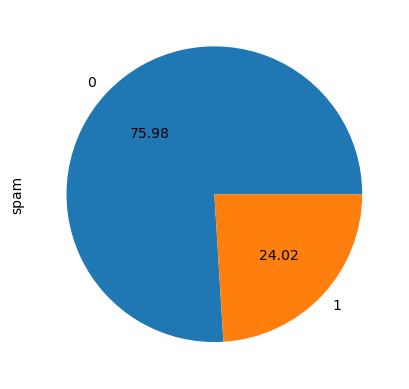

In [130]:
data['spam'].value_counts().plot.pie(autopct="%0.2f")

# Using NLTK
Not Scam value is more than scam value

In [131]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nikhil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [132]:
data['length']= data.text.apply(len)
data.head()

text  spam  length
0  naturally irresistible your corporate identity...     1    1475
1  he stock trading gunslinger  fanny is merrill ...     1     587
2  nbelievable new homes made easy  im wanting to...     1     438
3  4 color printing special  request additional i...     1     490
4  do not have money , get software cds from here...     1     226

In [133]:
data['num_of_words']=data.text.apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

text  spam  length  \
0  naturally irresistible your corporate identity...     1    1475   
1  he stock trading gunslinger  fanny is merrill ...     1     587   
2  nbelievable new homes made easy  im wanting to...     1     438   
3  4 color printing special  request additional i...     1     490   
4  do not have money , get software cds from here...     1     226   

   num_of_words  
0           323  
1            88  
2            86  
3            97  
4            51

In [134]:
data['num_of_sentance']=data.text.apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

text  spam  length  \
0  naturally irresistible your corporate identity...     1    1475   
1  he stock trading gunslinger  fanny is merrill ...     1     587   
2  nbelievable new homes made easy  im wanting to...     1     438   
3  4 color printing special  request additional i...     1     490   
4  do not have money , get software cds from here...     1     226   

   num_of_words  num_of_sentance  
0           323                9  
1            88                1  
2            86                4  
3            97                5  
4            51                5

In [135]:
data.describe()

spam        length  num_of_words  num_of_sentance
count  5695.000000   5695.000000   5695.000000      5695.000000
mean      0.240211   1546.521686    325.559614        15.882529
std       0.427249   2046.902877    419.534448        26.653287
min       0.000000      3.000000      1.000000         1.000000
25%       0.000000    496.500000    100.000000         6.000000
50%       0.000000    968.000000    208.000000        10.000000
75%       0.000000   1882.000000    400.000000        18.000000
max       1.000000  43943.000000   8477.000000      1229.000000

In [136]:
# Not Spam message
data[data.spam==0].describe().drop(columns='spam')

length  num_of_words  num_of_sentance
count   4327.000000   4327.000000      4327.000000
mean    1622.218396    344.447654        16.096372
std     1964.872753    407.107028        28.170576
min        3.000000      1.000000         1.000000
25%      566.000000    117.000000         6.000000
50%     1112.000000    238.000000        11.000000
75%     2024.500000    437.000000        19.000000
max    43943.000000   8477.000000      1229.000000

In [137]:
# spam message
data[data.spam==1].describe().drop(columns='spam')

length  num_of_words  num_of_sentance
count   1368.000000   1368.000000      1368.000000
mean    1307.092105    265.816520        15.206140
std     2271.298225    451.604636        21.144085
min        8.000000      3.000000         1.000000
25%      391.000000     78.000000         5.000000
50%      683.000000    139.000000         9.000000
75%     1238.750000    250.000000        16.000000
max    28421.000000   6129.000000       329.000000

Visualization

In [138]:
plt.figure(figsize=(12,6))
sns.histplot(data[data.spam==0]['length'],label='not spam',kde=True)
sns.histplot(data[data.spam==1]['length'],color='red',label='spam',kde=True)
plt.legend()

In [139]:
plt.figure(figsize=(12,6))
sns.histplot(data[data.spam==0]['num_of_words'],label='not spam',kde=True)
sns.histplot(data[data.spam==1]['num_of_words'],color='red',label='spam',kde=True)
plt.legend()

In [140]:
data.corr()

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_14112\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


spam    length  num_of_words  num_of_sentance
spam             1.000000 -0.065776     -0.080077        -0.014270
length          -0.065776  1.000000      0.986051         0.645315
num_of_words    -0.080077  0.986051      1.000000         0.709358
num_of_sentance -0.014270  0.645315      0.709358         1.000000

<Figure size 1500x1000 with 0 Axes>

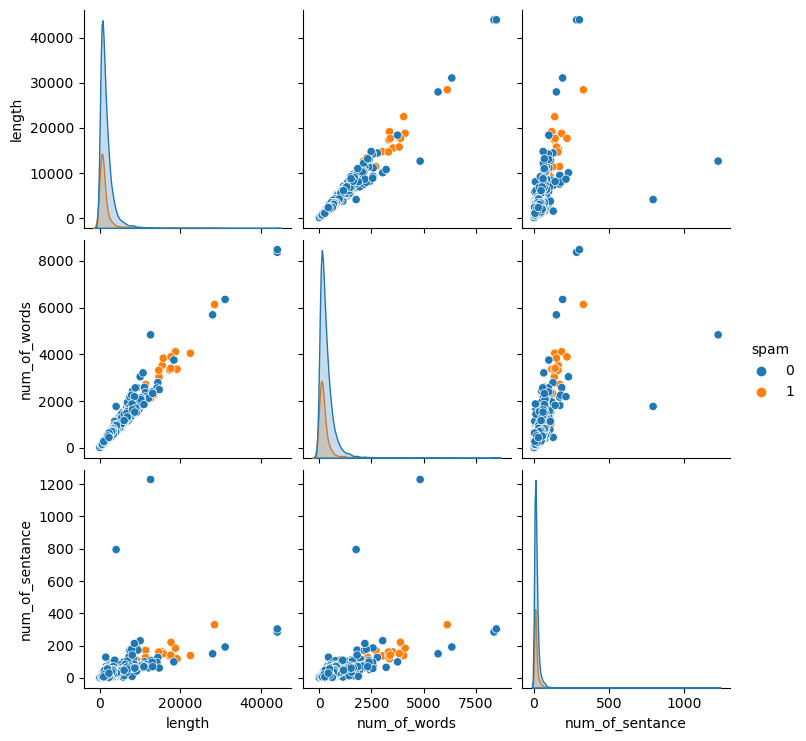

In [141]:
plt.figure(figsize=(15,10))
sns.pairplot(data, hue='spam')

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_14112\3212839323.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

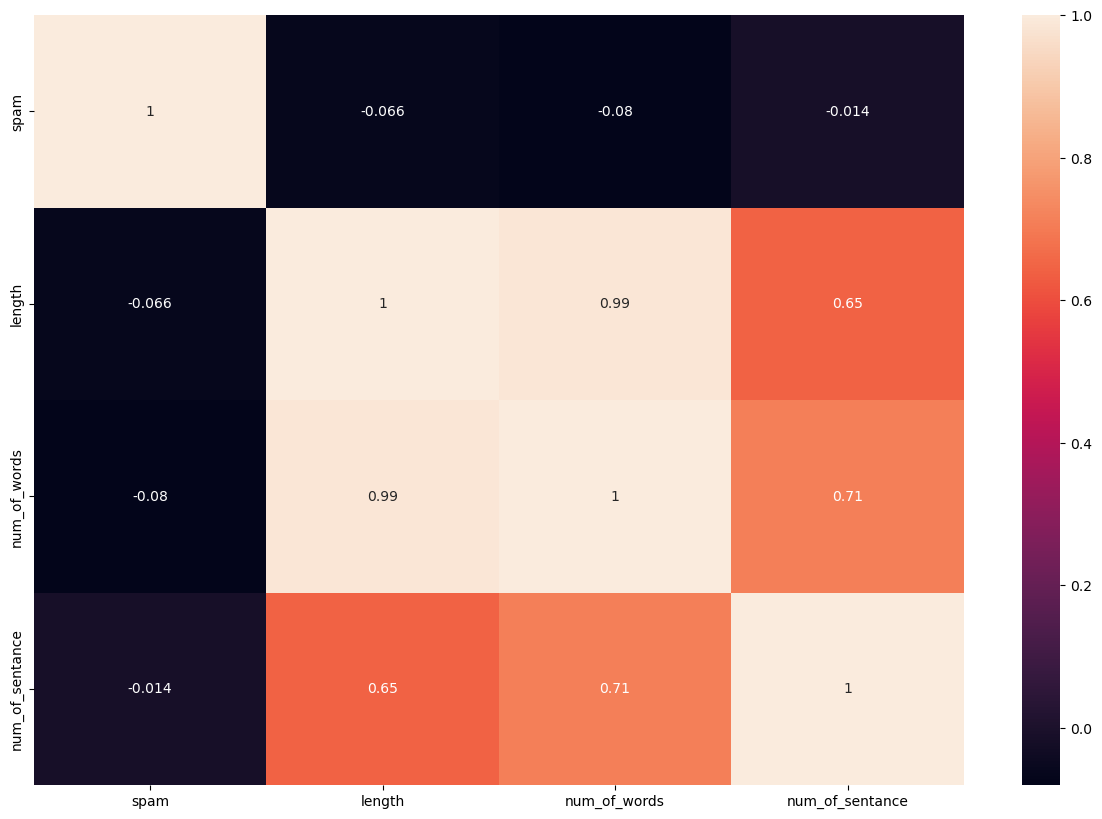

In [142]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size':10})
sns.heatmap(data.corr(),annot=True)

# Data Preprocessing
Tokenization,
Removing special characters,
Removing stop words and punctuation,
Stemming

In [143]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    text=text.lower()
    text =  nltk.word_tokenize(text)
    ps = PorterStemmer()
    y=[]
    k=[]
    # remove special characters
    for i in text:
        if i.isalnum():
            y.append(i)
   # remove stop words and punctuations
    for j in y:
        if j not in stopwords.words('english') and j not in string.punctuation:
            k.append(j)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [144]:
data['transformed_text']=data.text.apply(transform_text)

In [145]:
data['transformed_text'].head()

0    natur irresist your corpor ident lt is realli ...
1    he stock trade gunsling fanni is merril but mu...
2    nbeliev new home made easi im want to show you...
3    4 color print special request addit inform now...
4    do not have money get softwar cd from here sof...
Name: transformed_text, dtype: object

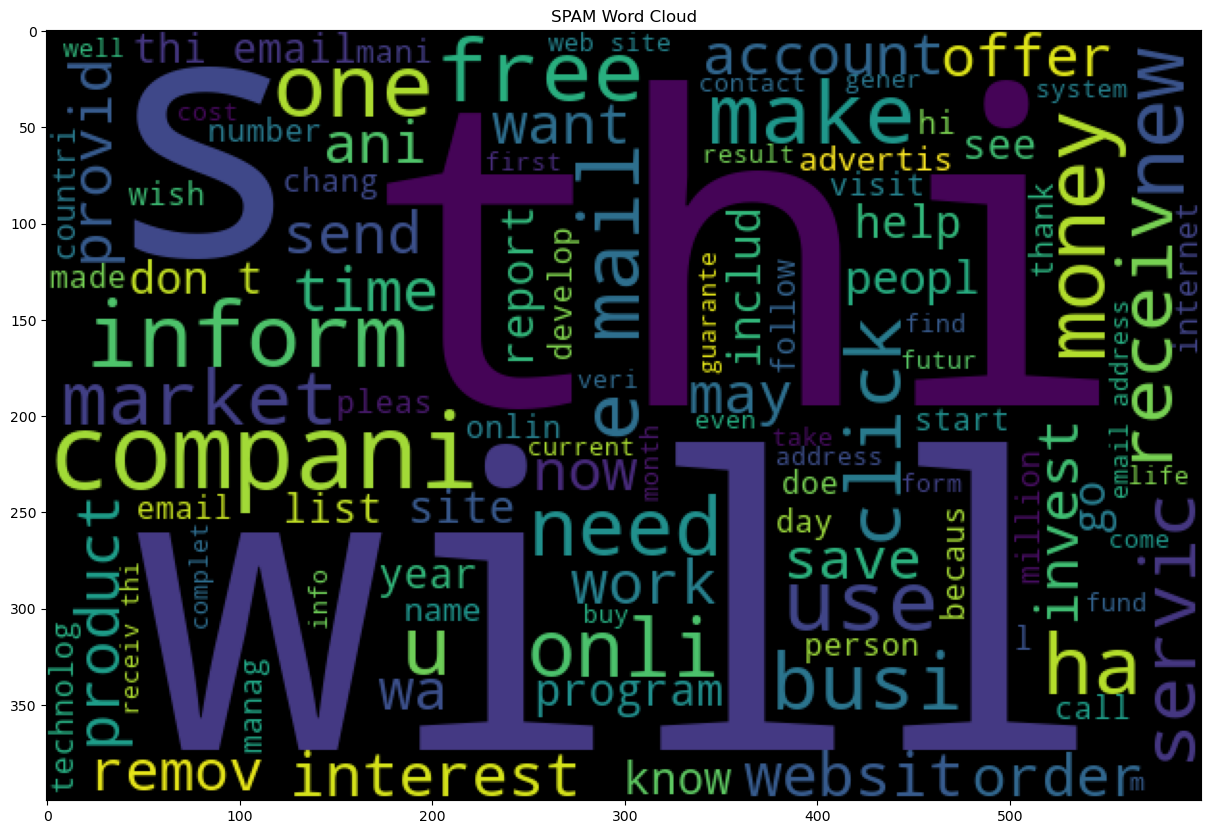

In [146]:
from wordcloud import WordCloud
wc = WordCloud(width=600, height=400, min_font_size=10)
spam_wc= wc.generate(data[data['spam']==1]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(15,10))
plt.title('SPAM Word Cloud')
plt.imshow(spam_wc)

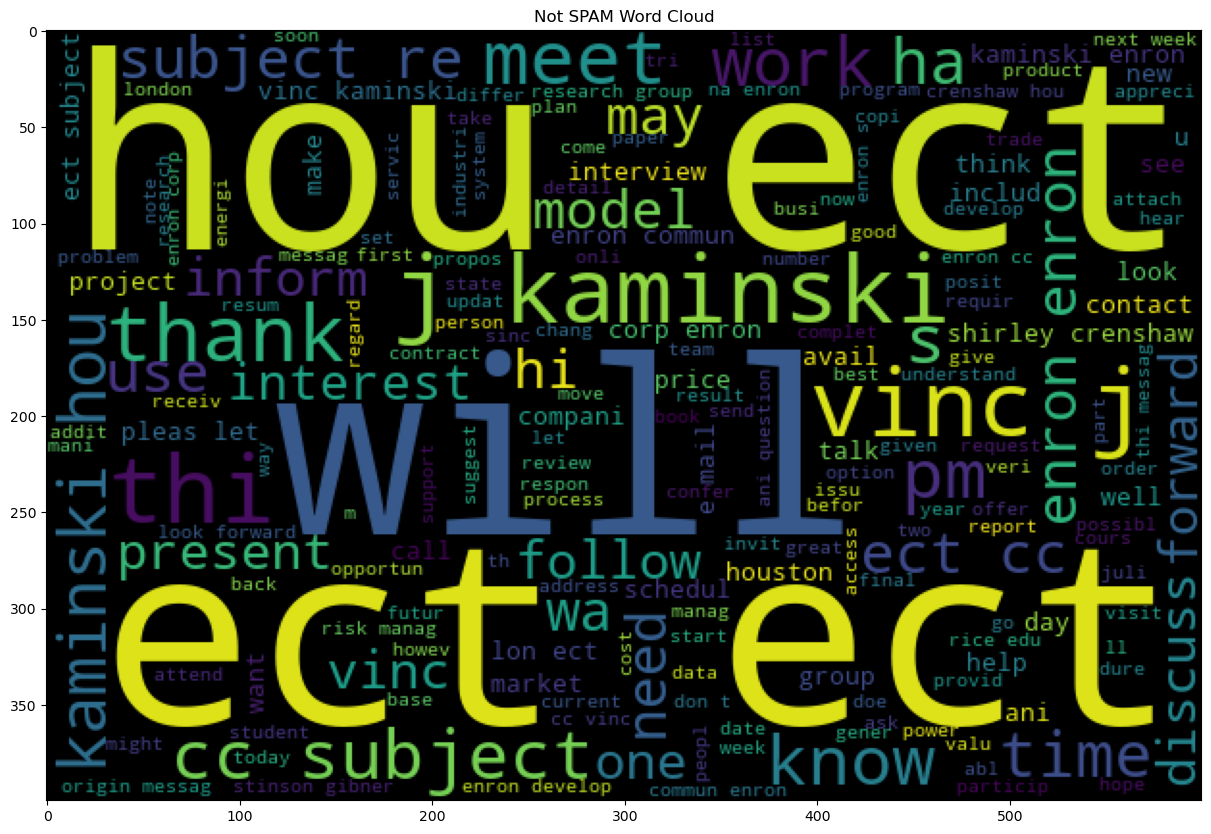

In [147]:
from wordcloud import WordCloud
wc = WordCloud(width=600, height=400, min_font_size=10)
spam_wc= wc.generate(data[data['spam']==0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(15,10))
plt.title('Not SPAM Word Cloud')
plt.imshow(spam_wc)

In [148]:
not_spam=[]
for msg in data[data['spam']==0]['transformed_text'].tolist():
    for word in msg.split():
        not_spam.append(word)

In [149]:
spam=[]
for msg in data[data['spam']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam.append(word)

Nodel Building

In [150]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data['transformed_text']).toarray()
X.shape

(5695, 29622)

In [151]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [152]:
y =data.spam.values

Split Data

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,classification_report
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(X_train, y_train)
y_pred1 =  gnb.predict(X_test)
print ('Classification Report GNB')
print(classification_report(y_test, y_pred1))

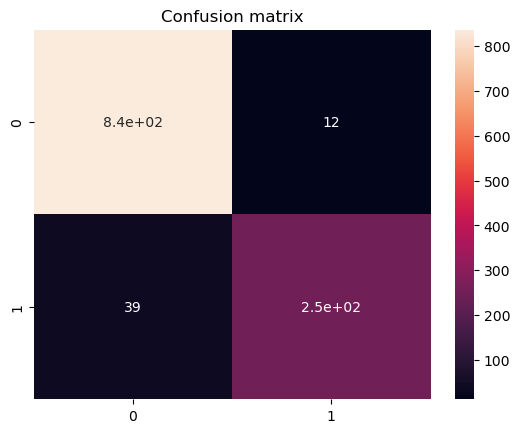

In [155]:
cm = confusion_matrix(y_test, y_pred1)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [156]:
mnb.fit(X_train, y_train)
y_pred2 =  mnb.predict(X_test)
print ('Classification Report MNB')
print(classification_report(y_test, y_pred2))

Classification Report MNB
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       849
           1       0.97      1.00      0.98       290

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139



In [157]:
cm = confusion_matrix(y_test, y_pred2)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [158]:
bnb.fit(X_train, y_train)
y_pred3 =  bnb.predict(X_test)
print ('Classification Report BNB')
print(classification_report(y_test, y_pred3))

Classification Report BNB
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       849
           1       0.94      0.99      0.97       290

    accuracy                           0.98      1139
   macro avg       0.97      0.98      0.98      1139
weighted avg       0.98      0.98      0.98      1139




Naive Bayes (TFIDF Vectorizer)

In [176]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [180]:
X = tfidf.fit_transform(data['transformed_text']).toarray()
y =data.spam.values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [161]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,classification_report
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(X_train, y_train)
y_pred1 =  gnb.predict(X_test)
print ('Classification Report GNB')
print(classification_report(y_test, y_pred1))

Classification Report GNB
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       849
           1       0.96      0.85      0.90       290

    accuracy                           0.95      1139
   macro avg       0.95      0.92      0.93      1139
weighted avg       0.95      0.95      0.95      1139



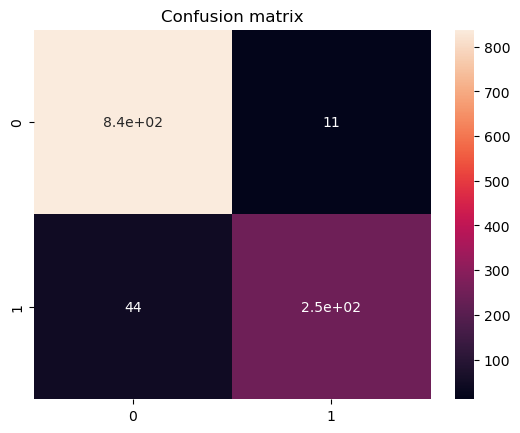

In [162]:
cm = confusion_matrix(y_test, y_pred1)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [163]:
mnb.fit(X_train, y_train)
y_pred2 =  mnb.predict(X_test)
print ('Classification Report MNB')
print(classification_report(y_test, y_pred2))

Classification Report MNB
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       849
           1       0.99      0.96      0.97       290

    accuracy                           0.99      1139
   macro avg       0.99      0.98      0.98      1139
weighted avg       0.99      0.99      0.99      1139



In [164]:
bnb.fit(X_train, y_train)
y_pred3 =  bnb.predict(X_test)
print ('Classification Report BNB')
print(classification_report(y_test, y_pred3))

Classification Report BNB
              precision    recall  f1-score   support

           0       1.00      0.90      0.94       849
           1       0.76      0.99      0.86       290

    accuracy                           0.92      1139
   macro avg       0.88      0.94      0.90      1139
weighted avg       0.94      0.92      0.92      1139



In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [166]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [167]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [168]:
accuracy_s=[]
precision_s=[]

for name, clf in clfs.items():
    accuracy,precision = train_classifier(clf,X_train, y_train,X_test,y_test)
    print ("For {}".format(name) + ' Classifier')
    print ("Accuracy ----> {}".format(accuracy))
    print ("Precision ----> {}".format(precision))
    accuracy_s.append(accuracy)
    precision_s.append(precision)

For SVC Classifier
Accuracy ----> 0.9929762949956101
Precision ----> 0.993006993006993
For KN Classifier
Accuracy ----> 0.9622475856014048
Precision ----> 0.8731117824773413
For NB Classifier
Accuracy ----> 0.9859525899912204
Precision ----> 0.9892857142857143
For DT Classifier
Accuracy ----> 0.9016681299385426
Precision ----> 0.7367021276595744
For LR Classifier
Accuracy ----> 0.9771729587357331
Precision ----> 0.9714285714285714
For RF Classifier
Accuracy ----> 0.9719051799824407
Precision ----> 0.9777777777777777
For AdaBoost Classifier
Accuracy ----> 0.9841966637401229
Precision ----> 0.9689655172413794
For BgC Classifier
Accuracy ----> 0.9692712906057945
Precision ----> 0.9322033898305084
For ETC Classifier
Accuracy ----> 0.9640035118525022
Precision ----> 0.9806949806949807
For GBDT Classifier
Accuracy ----> 0.961369622475856
Precision ----> 0.9730769230769231
For xgb Classifier
Accuracy ----> 0.9885864793678666
Precision ----> 0.9825783972125436


In [169]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_s,'Precision':precision_s}).sort_values('Precision',ascending=False)
performance_df

Algorithm  Accuracy  Precision
0        SVC  0.992976   0.993007
2         NB  0.985953   0.989286
10       xgb  0.988586   0.982578
8        ETC  0.964004   0.980695
5         RF  0.971905   0.977778
9       GBDT  0.961370   0.973077
4         LR  0.977173   0.971429
6   AdaBoost  0.984197   0.968966
7        BgC  0.969271   0.932203
1         KN  0.962248   0.873112
3         DT  0.901668   0.736702

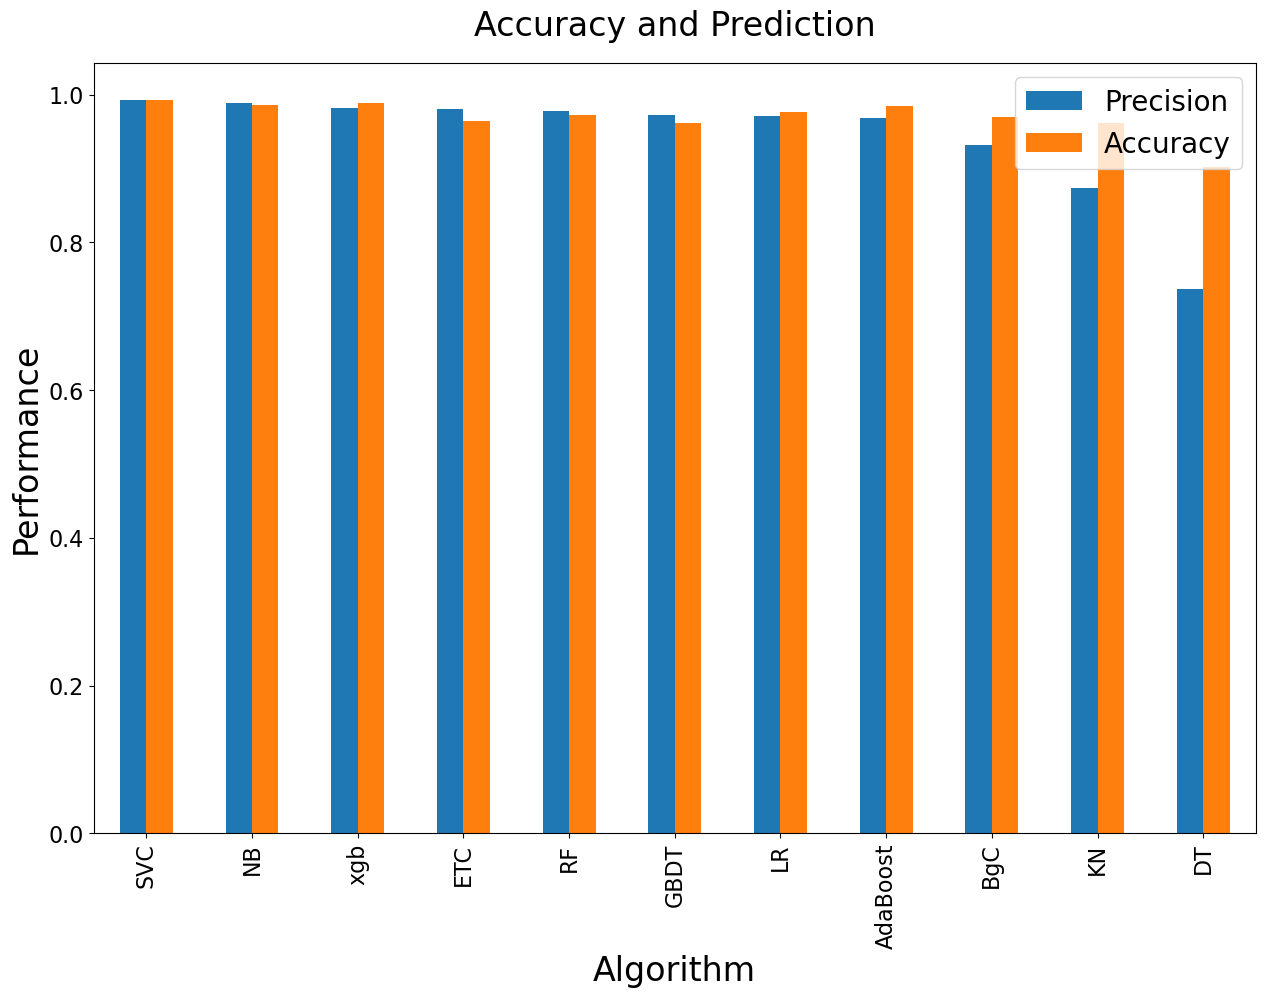

In [170]:
ax3 = performance_df.plot(x="Algorithm", y=["Precision", "Accuracy"],kind="bar",figsize=(15, 10), fontsize=16)
ax3.set_title('Accuracy and Prediction',pad=20, fontdict={'fontsize':24})
ax3.set_ylabel('Performance', fontdict={'fontsize':24})
ax3.set_xlabel('Algorithm', fontdict={'fontsize':24})
ax3.legend(loc='upper right',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

I have chosen Naive Bayes, AdaBoost and XGBClassifier as top performing classifier based on the precision score

In [171]:
from sklearn.ensemble import VotingClassifier
# group / ensemble of models
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
estimator = [('svm', svc), ('MNB', mnb), ('ETC',etc)]

In [172]:
voting = VotingClassifier(estimator,voting='soft')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('MNB', MultinomialNB()),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [173]:
y_pred5 = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred5))
print("Precision",precision_score(y_test,y_pred5))

Accuracy 0.9920983318700615
Precision 0.9964664310954063


Model Export

In [174]:
import joblib
import pickle

In [182]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
mnb = MultinomialNB()

In [184]:
tfidf.fit_transform(data['transformed_text']).toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.11803994, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [185]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))